Задача 5
=======
Ничто так не помогает понять условие задачи, как её визуализация, поэтому:

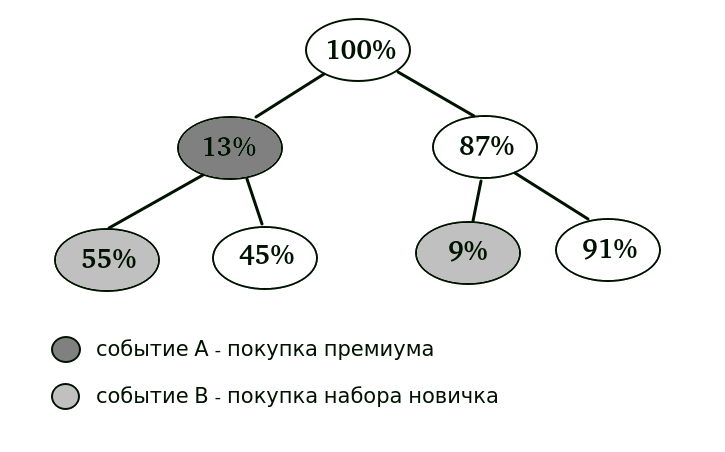

В начале думалось, что это фомула Байеса, но потом можно просто увидеть, что событие А совершается при событии В только в самой левой ветке и составляет лишь 55% от 13%, т.е.:

In [105]:
answer = 0.55 * 13
print('вероятность покупки премиум при покупке набора новичка {:.2f} %'.format(answer))

вероятность покупки премиум при покупке набора новичка 7.15 %


Задача 6
=======
полагаю по условию задачи, что рассчитать нужно ровно количество выпавших редких вещей, а не НЕ МЕНЕЕ, что означает для, например, события выпадения одной вещи в одном сундуке, в остальных сундуках событие обязательно не происходит. тогда расчет будет таков:

In [89]:
P_zero_items = 0.73 * 0.73 * 0.73 * 100
P_one_item = 0.73 * 0.73 * 0.27 * 100
P_two_items = 0.73 * 0.27 * 0.27 * 100
P_three_items = 0.27 * 0.27 * 0.27 * 100
print(' zero items probability  {:.1f} %'.format(P_zero_items) + '\n',
      'one item probability  {:.1f} %'.format(P_one_item) + '\n',
      'two item probability  {:.1f} %'.format(P_two_items) + '\n',
      'three item probability  {:.1f} %'.format(P_three_items))

 zero items probability  38.9 %
 one item probability  14.4 %
 two item probability  5.3 %
 three item probability  2.0 %


но как бы я себе не доверяла, лучше проверю и смоделирую, посмотрев, что на это скажет Python:

In [101]:
from random import randrange
import pandas as pd

In [99]:
# функция открытия сундука, если выпала редкая вещь возвращает True, в противном случае False
def open_chest(probability):
    pivot = randrange(101)
    trigger = False
    if pivot <= probability:
        trigger = True
    return trigger

num_of_experiment = 10000 
counter_zero_item = 0
counter_one_item = 0
counter_two_item = 0
counter_three_item = 0

# открываем сундуки num_of_experiment раз и считаем при каких условия сколько вещей появляется
for i in range(num_of_experiment):
    one_chest = open_chest(27)
    two_chest = open_chest(27)
    three_chest = open_chest(27)
    
    if not one_chest and not two_chest and not three_chest:
        counter_zero_item += 1
    
    elif one_chest and not two_chest and not three_chest:
        counter_one_item += 1
        
    elif one_chest and two_chest and not three_chest:
        counter_two_item += 1
    
    elif one_chest and two_chest and three_chest:
        counter_three_item += 1

# коэффициент переводит полученные данные в проценты
koeff = 100 / num_of_experiment 
print(' zero items probability  {:.0f} %'.format(counter_zero_item * koeff) + '\n',
      'one item probability  {:.0f} %'.format(counter_one_item * koeff) + '\n',
      'two item probability  {:.0f} %'.format(counter_two_item * koeff) + '\n',
      'three item probability  {:.0f} %'.format(counter_three_item * koeff))

 zero items probability  38 %
 one item probability  14 %
 two item probability  5 %
 three item probability  2 %


In [103]:
# Для удобства сравнения
pd.DataFrame([[ 38.9, 38],[14.4, 14],[5.3, 5],[2, 2]], columns=['расчёт', 'эксперимент'])

,расчёт,эксперимент
0,38.9,38
1,14.4,14
2,5.3,5
3,2.0,2
